In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
cities = pd.read_csv('20230310_ukraineCities.csv')
cities

,city,region,population,area_km2
0,Авдіївка,Донецька область,37 210,29.00
1,Алмазна,Луганська область,5 061,1.33
2,Алупка,АР Крим,9 018,4.00
3,Алушта,АР Крим,31 440,7.00
4,Алчевськ,Луганська область,119 193,50.00
...,...,...,...,...
456,Яготин,Київська область,23 659,57.50
457,Ялта,АР Крим,81 654,28.29
458,Ямпіль,Вінницька область,11 787,9.50
459,Яремче,Івано-Франківська область,7 850,114.00


In [20]:
cities['region'] = cities['region'].str.replace(' область', '')
cities['region'] = cities['region'].str.replace('АР ', '')
cities['population'] = cities['population'].str.replace(' ', '')
cities

,city,region,population,area_km2
0,Авдіївка,Донецька,37210,29.00
1,Алмазна,Луганська,5061,1.33
2,Алупка,Крим,9018,4.00
3,Алушта,Крим,31440,7.00
4,Алчевськ,Луганська,119193,50.00
...,...,...,...,...
456,Яготин,Київська,23659,57.50
457,Ялта,Крим,81654,28.29
458,Ямпіль,Вінницька,11787,9.50
459,Яремче,Івано-Франківська,7850,114.00


In [22]:
print(cities.dtypes)

city           object
region         object
population     object
area_km2      float64
dtype: object


In [21]:
is_convertible = pd.to_numeric(cities['population'], errors='coerce').notnull().all()
is_convertible

False

In [22]:
cities_filt = cities.copy()
cities_filt['population'] = pd.to_numeric(cities_filt['population'], errors='coerce')
cities_filt = cities_filt[cities_filt['population'].isnull()]
cities_filt

,city,region,population,area_km2
263,Мукачево,Закарпатська,NaN,27.9


In [23]:
cities[cities['city'] == 'Мукачево']

,city,region,population,area_km2
263,Мукачево,Закарпатська,82 346,27.9


In [24]:
cities['population'][cities['city'] == 'Мукачево'] = 82346
is_convertible = pd.to_numeric(cities['population'], errors='coerce').notnull().all()
is_convertible

True

In [25]:
cities['population'] = pd.to_numeric(cities['population'])
print(cities.dtypes)

city           object
region         object
population      int64
area_km2      float64
dtype: object


In [26]:
replace_values = {'\xa0Донецька': 'Donetska', 
                  '\xa0Луганська': 'Luhanska', 
                  '\xa0Львівська': 'Lvivska', 
                  '\xa0Київська': 'Kyivska', 
                  '\xa0Дніпропетровська': 'Dnipropetrovska', 
                  '\xa0Одеська': 'Odeska', 
                  '\xa0Вінницька': 'Vinnytska', 
                  '\xa0Тернопільська': 'Ternopilska', 
                  '\xa0Харківська': 'Kharkivska', 
                  '\xa0Чернігівська': 'Chernihivska', 
                  '\xa0Крим': 'Crimea',
                  '\xa0Полтавська': 'Poltavska',
                  '\xa0Черкаська': 'Cherkaska',
                  '\xa0Сумська': 'Sumska',
                  '\xa0Івано-Франківська': 'Ivano-Frankivska',
                  '\xa0Запорізька': 'Zaporizka',
                  '\xa0Хмельницька': 'Khmelnytska',
                  '\xa0Житомирська': 'Zhytomyrska',
                  '\xa0Кіровоградська': 'Kirovohradska',
                  '\xa0Закарпатська': 'Zakarpatska',
                  '\xa0Рівненська': 'Rivnenska',
                  '\xa0Волинська': 'Volynska',
                  '\xa0Чернівецька': 'Chernyvetska',
                  '\xa0Херсонська': 'Khersonska',
                  '\xa0Миколаївська': 'Mykolayivska',
                  '\xa0Севастополь, міськрада': 'Sevastopol',
                  '\xa0Київ, міськрада': 'Kyiv'}
cities['region'] = cities['region'].replace(replace_values)
cities

,city,region,population,area_km2
0,Авдіївка,Donetska,37210,29.00
1,Алмазна,Luhanska,5061,1.33
2,Алупка,Crimea,9018,4.00
3,Алушта,Crimea,31440,7.00
4,Алчевськ,Luhanska,119193,50.00
...,...,...,...,...
456,Яготин,Kyivska,23659,57.50
457,Ялта,Crimea,81654,28.29
458,Ямпіль,Vinnytska,11787,9.50
459,Яремче,Ivano-Frankivska,7850,114.00


In [27]:
regions_counts_bycity = pd.DataFrame(cities['region'].value_counts()).reset_index().rename(columns={'index': 'region', 'region': 'city_count'})
regions_counts_bycity

,region,city_count
0,Donetska,52
1,Lvivska,44
2,Luhanska,37
3,Kyivska,26
4,Dnipropetrovska,20
5,Odeska,19
6,Vinnytska,18
7,Ternopilska,18
8,Kharkivska,17
9,Chernihivska,16


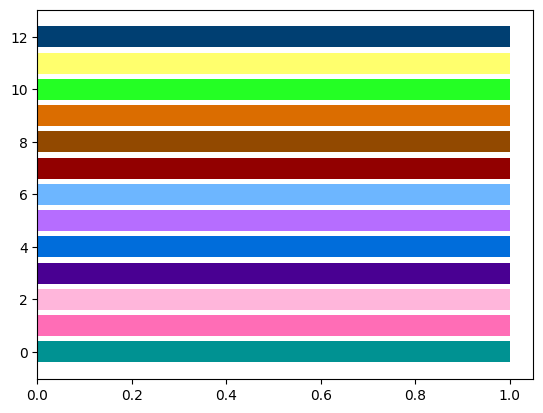

In [28]:
cbPalette = ["#009292", "#ff6db6", "#ffb6db", "#490092", "#006ddb", "#b66dff", 
              "#6db6ff", "#920000", "#924900", "#db6d00", "#24ff24", "#ffff6d", '#003f72']

fig, ax = plt.subplots()
for i in range(len(cbPalette)):
    ax.barh(i, 1, color=cbPalette[i], label=cbPalette[i])
plt.show()

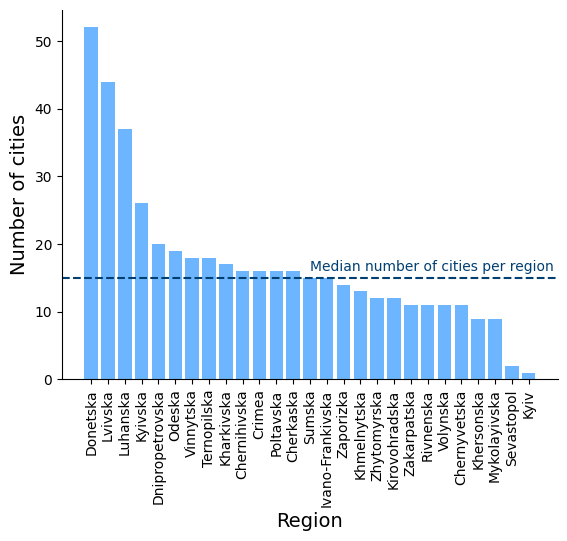

In [29]:
citycount_median = regions_counts_bycity['city_count'].median()

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_counts_bycity['region'], regions_counts_bycity['city_count'], color=cbPalette[6])
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_counts_bycity['region'], rotation=90)
ax.set_ylabel('Number of cities', fontsize = 14)

# line for the median number of cities per region
ax.axhline(y = citycount_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, citycount_median+1, 'Median number of cities per region', color=cbPalette[12], fontsize=10, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

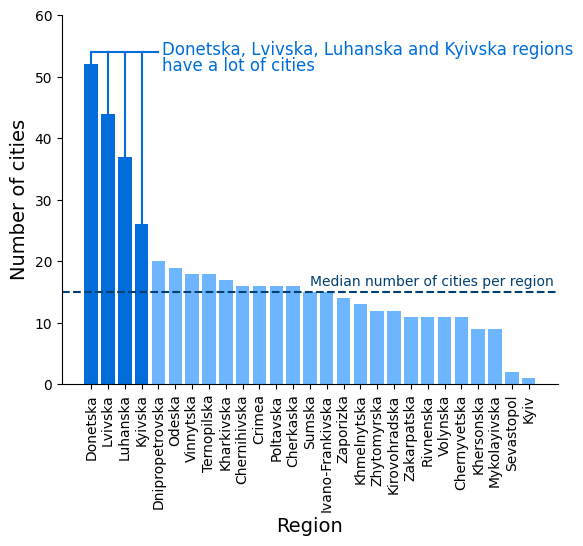

In [30]:
cols = [cbPalette[4]]*4+[cbPalette[6]]*(len(regions_counts_bycity)-4)
don_coord = regions_counts_bycity.loc[regions_counts_bycity['region'] == 'Donetska', 'city_count'].values[0]
lviv_coord = regions_counts_bycity.loc[regions_counts_bycity['region'] == 'Lvivska', 'city_count'].values[0]
luh_coord = regions_counts_bycity.loc[regions_counts_bycity['region'] == 'Luhanska', 'city_count'].values[0]
kyiv_coord = regions_counts_bycity.loc[regions_counts_bycity['region'] == 'Kyivska', 'city_count'].values[0]

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_counts_bycity['region'], regions_counts_bycity['city_count'], color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_counts_bycity['region'], rotation=90)
ax.set_ylabel('Number of cities', fontsize = 14)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Point at highlighted bars
coords_x = [0,1,2,3]
coords_y = [(don_coord, don_coord+2), (lviv_coord, don_coord+2), (luh_coord, don_coord+2), (kyiv_coord, don_coord+2)]
for i in range(len(coords_x)):
    ax.plot((coords_x[i],coords_x[i]),coords_y[i], color=cbPalette[4])
ax.plot((0,4), (don_coord+2, don_coord+2), color=cbPalette[4])
selected_regions_string = regions_counts_bycity['region'][0] + ', ' + regions_counts_bycity['region'][1] + ', ' + regions_counts_bycity['region'][2] + ' and ' + regions_counts_bycity['region'][3] + ' regions'
ax.text(4.2, don_coord+1.5, selected_regions_string, color=cbPalette[4], fontsize=12)
ax.text(4.2, don_coord-1, 'have a lot of cities', color=cbPalette[4], fontsize=12)

# line for the median number of cities per region
ax.axhline(y = citycount_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, citycount_median+1, 'Median number of cities per region', color=cbPalette[12], fontsize=10, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

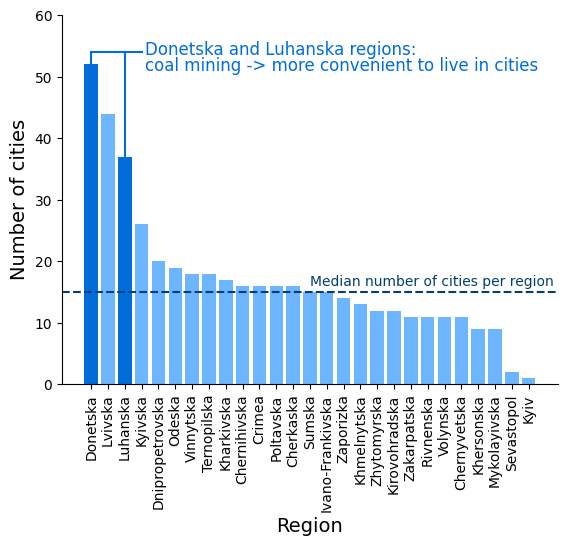

In [31]:
cols = [cbPalette[4]]+[cbPalette[6]]+[cbPalette[4]]+[cbPalette[6]]*(len(regions_counts_bycity)-3)

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_counts_bycity['region'], regions_counts_bycity['city_count'], color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_counts_bycity['region'], rotation=90)
ax.set_ylabel('Number of cities', fontsize = 14)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Point at highlighted bars
coords_x = [0,2]
coords_y = [(don_coord, don_coord+2), (luh_coord, don_coord+2)]
for i in range(len(coords_x)):
    ax.plot((coords_x[i],coords_x[i]),coords_y[i], color=cbPalette[4])
ax.plot((0,3), (don_coord+2, don_coord+2), color=cbPalette[4])
selected_regions_string = regions_counts_bycity['region'][0] + ' and ' + regions_counts_bycity['region'][2] + ' regions:'
ax.text(3.2, don_coord+1.5, selected_regions_string, color=cbPalette[4], fontsize=12)
ax.text(3.2, don_coord-1, 'coal mining -> more convenient to live in cities', color=cbPalette[4], fontsize=12)

# line for the median number of cities per region
ax.axhline(y = citycount_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, citycount_median+1, 'Median number of cities per region', color=cbPalette[12], fontsize=10, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

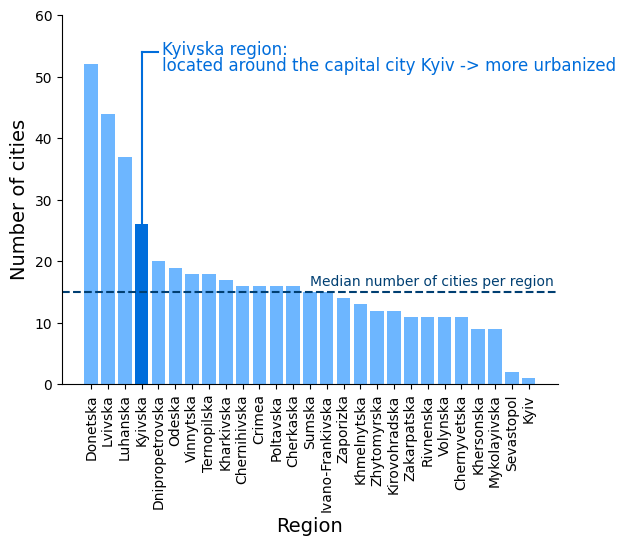

In [32]:
cols = [cbPalette[6]]*3+[cbPalette[4]]+[cbPalette[6]]*(len(regions_counts_bycity)-4)

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_counts_bycity['region'], regions_counts_bycity['city_count'], color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_counts_bycity['region'], rotation=90)
ax.set_ylabel('Number of cities', fontsize = 14)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Point at highlighted bars
ax.plot((3,3),(kyiv_coord, don_coord+2), color=cbPalette[4])
ax.plot((3,4), (don_coord+2, don_coord+2), color=cbPalette[4])
selected_regions_string = regions_counts_bycity['region'][3] + ' region:'
ax.text(4.2, don_coord+1.5, selected_regions_string, color=cbPalette[4], fontsize = 12)
ax.text(4.2, don_coord-1, 'located around the capital city Kyiv -> more urbanized', color=cbPalette[4], fontsize=12)

# line for the median number of cities per region
ax.axhline(y = citycount_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, citycount_median+1, 'Median number of cities per region', color=cbPalette[12], fontsize=10, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

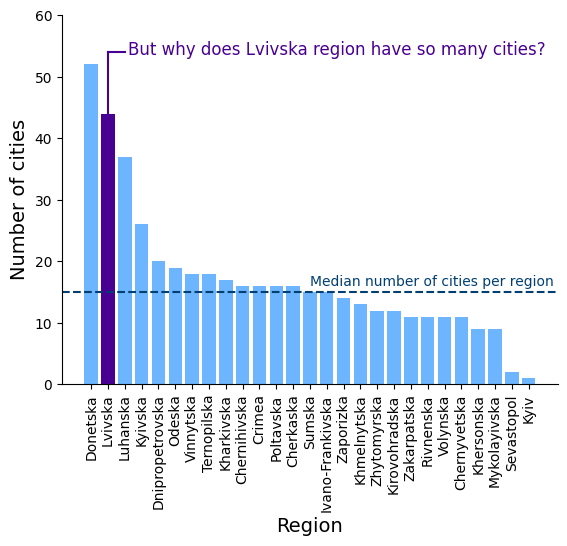

In [33]:
cols = [cbPalette[6]]+[cbPalette[3]]+[cbPalette[6]]*(len(regions_counts_bycity)-2)

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_counts_bycity['region'], regions_counts_bycity['city_count'], color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_counts_bycity['region'], rotation=90)
ax.set_ylabel('Number of cities', fontsize = 14)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Point at highlighted bars
ax.plot((1,1),(lviv_coord, don_coord+2), color=cbPalette[3])
ax.plot((1,2), (don_coord+2, don_coord+2), color=cbPalette[3])
selected_regions_string = 'But why does ' + regions_counts_bycity['region'][1] + ' region have so many cities?'
ax.text(2.2, don_coord+1.5, selected_regions_string, color=cbPalette[3], fontsize = 12)

# line for the median number of cities per region
ax.axhline(y = citycount_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, citycount_median+1, 'Median number of cities per region', color=cbPalette[12], fontsize=10, ha='right')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [34]:
regions_counts_bycity['area_km2'] = [26517,21833,26684,28131,31914,33310,26513,13823,31415,31865,26200,
                                     28748,20900,23834,13900,27180,20645,29832,24588,12777,20047,20144,
                                     8097,28461,24598,864,839]
regions = regions_counts_bycity.copy()
regions

,region,city_count,area_km2
0,Donetska,52,26517
1,Lvivska,44,21833
2,Luhanska,37,26684
3,Kyivska,26,28131
4,Dnipropetrovska,20,31914
5,Odeska,19,33310
6,Vinnytska,18,26513
7,Ternopilska,18,13823
8,Kharkivska,17,31415
9,Chernihivska,16,31865


In [35]:
regions['cities_per_km2'] = regions['city_count']/regions['area_km2']
regions 

,region,city_count,area_km2,cities_per_km2
0,Donetska,52,26517,0.001961
1,Lvivska,44,21833,0.002015
2,Luhanska,37,26684,0.001387
3,Kyivska,26,28131,0.000924
4,Dnipropetrovska,20,31914,0.000627
5,Odeska,19,33310,0.000570
6,Vinnytska,18,26513,0.000679
7,Ternopilska,18,13823,0.001302
8,Kharkivska,17,31415,0.000541
9,Chernihivska,16,31865,0.000502


Text(27.5, 0.0006608206763447177, 'Median number of cities per km2')

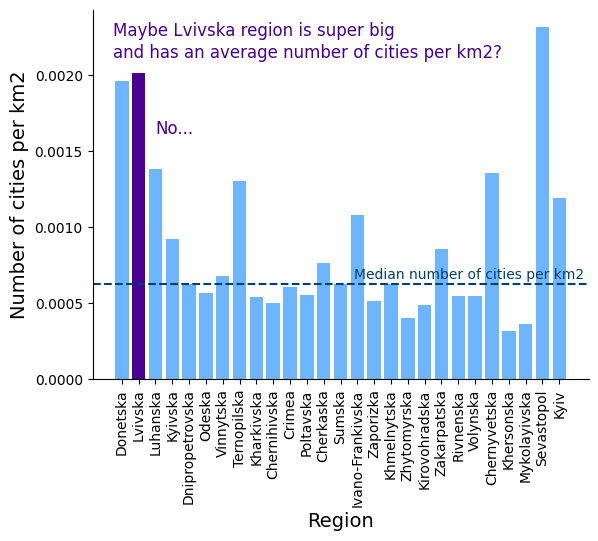

In [36]:
fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions['region'], regions['cities_per_km2'], color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions['region'], rotation=90)
ax.set_ylabel('Number of cities per km2', fontsize = 14)
#ylim = ax.get_ylim()
#ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Title
lviv_coord = regions.loc[regions['region'] == 'Lvivska', 'cities_per_km2'].values[0]
selected_regions_string = 'Maybe ' + regions['region'][1] + ' region is super big'
ax.text(-0.5, lviv_coord*1.12, selected_regions_string, color=cbPalette[3], fontsize=12, ha='left')
ax.text(-0.5, lviv_coord*1.05, 'and has an average number of cities per km2?', color=cbPalette[3], fontsize=12, ha='left')
ax.text(2, lviv_coord*0.8, 'No...', color=cbPalette[3], fontsize=12, ha='left')

# Median number of cities per km2
city_per_km2_median = regions['cities_per_km2'].median()
ax.axhline(y = city_per_km2_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_counts_bycity)+0.5, city_per_km2_median*1.05, 'Median number of cities per km2', color=cbPalette[12], fontsize=10, ha='right')

In [37]:
grouped_cities = cities.groupby('region')['area_km2'].sum()
grouped_cities

region
Cherkaska            640.700
Chernihivska         531.770
Chernyvetska         237.860
Crimea               693.880
Dnipropetrovska     1382.670
Donetska            2272.310
Ivano-Frankivska     625.170
Kharkivska           861.410
Khersonska           289.700
Khmelnytska          396.160
Kirovohradska        441.590
Kyiv                 847.660
Kyivska              904.820
Luhanska            1499.680
Lvivska              633.590
Mykolayivska         401.980
Odeska               599.792
Poltavska            592.560
Rivnenska            234.380
Sevastopol           866.000
Sumska               514.350
Ternopilska          289.400
Vinnytska            325.080
Volynska             188.220
Zakarpatska          238.640
Zaporizka            684.420
Zhytomyrska          356.100
Name: area_km2, dtype: float64

In [38]:
regions = pd.merge(regions, grouped_cities, on='region', how='inner').rename(columns={'area_km2_x': 'region_area_km2', 'area_km2_y': 'total_city_area_km2'})
regions

,region,city_count,region_area_km2,cities_per_km2,total_city_area_km2
0,Donetska,52,26517,0.001961,2272.310
1,Lvivska,44,21833,0.002015,633.590
2,Luhanska,37,26684,0.001387,1499.680
3,Kyivska,26,28131,0.000924,904.820
4,Dnipropetrovska,20,31914,0.000627,1382.670
5,Odeska,19,33310,0.000570,599.792
6,Vinnytska,18,26513,0.000679,325.080
7,Ternopilska,18,13823,0.001302,289.400
8,Kharkivska,17,31415,0.000541,861.410
9,Chernihivska,16,31865,0.000502,531.770


In [39]:
regions['proportion_of_city_area'] = regions['total_city_area_km2']/regions['region_area_km2']
regions.loc[regions['proportion_of_city_area'] > 1, 'proportion_of_city_area'] = 1
regions

,region,city_count,region_area_km2,cities_per_km2,total_city_area_km2,proportion_of_city_area
0,Donetska,52,26517,0.001961,2272.310,0.085693
1,Lvivska,44,21833,0.002015,633.590,0.029020
2,Luhanska,37,26684,0.001387,1499.680,0.056201
3,Kyivska,26,28131,0.000924,904.820,0.032165
4,Dnipropetrovska,20,31914,0.000627,1382.670,0.043325
5,Odeska,19,33310,0.000570,599.792,0.018006
6,Vinnytska,18,26513,0.000679,325.080,0.012261
7,Ternopilska,18,13823,0.001302,289.400,0.020936
8,Kharkivska,17,31415,0.000541,861.410,0.027420
9,Chernihivska,16,31865,0.000502,531.770,0.016688


Text(-4, -4, 'Sevastopol and Kyiv are excluded from the plot for clarity. Their urban area proportion is 100%')

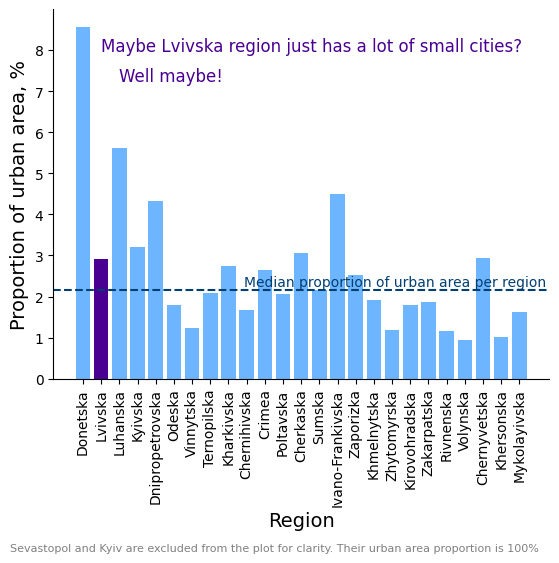

In [40]:
regions_filt = regions[regions['proportion_of_city_area'] != 1]

fig, ax = plt.subplots()
# barplot backbone
ax.bar(regions_filt['region'], regions_filt['proportion_of_city_area']*100, color=cols)
ax.set_xlabel('Region', fontsize = 14)
ax.set_xticklabels(regions_filt['region'], rotation=90)
ax.set_ylabel('Proportion of urban area, %', fontsize = 14)
#ylim = ax.get_ylim()
#ax.set_ylim(ylim[0], ylim[1] * 1.1)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Title
lviv_coord = regions_filt.loc[regions_filt['region'] == 'Lvivska', 'proportion_of_city_area'].values[0]*100
selected_regions_string = 'Maybe ' + regions['region'][1] + ' region just has a lot of small cities?'
ax.text(1, lviv_coord*2.75, selected_regions_string, color=cbPalette[3], fontsize=12, ha='left')
ax.text(2, lviv_coord*2.5, 'Well maybe!', color=cbPalette[3], fontsize=12, ha='left')

# Median number of cities per km2
city_area_proportion_median = (regions['proportion_of_city_area']*100).median()
ax.axhline(y = city_area_proportion_median, color = cbPalette[12], linestyle = '--')
ax.text(len(regions_filt)+0.5, city_area_proportion_median*1.05, 'Median proportion of urban area per region', color=cbPalette[12], fontsize=10, ha='right')

# Sevastopol and Kyiv are excluded
ax.text(-4, -4, 'Sevastopol and Kyiv are excluded from the plot for clarity. Their urban area proportion is 100%', color='grey', fontsize=8, ha='left', va='top')

In [47]:
my_pal

{'Donetska': '#6db6ff',
 'Luhanska': '#6db6ff',
 'Crimea': '#6db6ff',
 'Odeska': '#6db6ff',
 'Zhytomyrska': '#6db6ff',
 'Dnipropetrovska': '#6db6ff',
 'Kharkivska': '#6db6ff',
 'Vinnytska': '#6db6ff',
 'Chernihivska': '#6db6ff',
 'Mykolayivska': '#6db6ff',
 'Lvivska': '#490092',
 'Zaporizka': '#6db6ff',
 'Zakarpatska': '#6db6ff',
 'Ternopilska': '#6db6ff',
 'Kyivska': '#6db6ff',
 'Rivnenska': '#6db6ff',
 'Volynska': '#6db6ff',
 'Khersonska': '#6db6ff',
 'Sumska': '#6db6ff',
 'Kirovohradska': '#6db6ff',
 'Ivano-Frankivska': '#6db6ff',
 'Cherkaska': '#6db6ff',
 'Chernyvetska': '#6db6ff',
 'Khmelnytska': '#6db6ff',
 'Poltavska': '#6db6ff'}